In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
sys.path.append('/sternadi/home/volume2/noam/SternLab')
from blast_utilities import blast_to_df
import scipy.stats
from freqs_utilities import unite_all_freq_files, compatibilty_old_to_new, estimate_insertion_freq
import glob
import numpy as np

In [35]:
#b = blast_to_df('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-z/tmp/2813_sample_sample_2h-z_contig_list_trimmed.part1.fasta.blast')
#b = blast_to_df('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-u/tmp/2813_sample_sample_2h-u_contig_list_trimmed.part1.fasta.blast')
b = blast_to_df('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_15/tmp/2813_sample_sample_15_contig_list_trimmed.part1.fasta.blast')



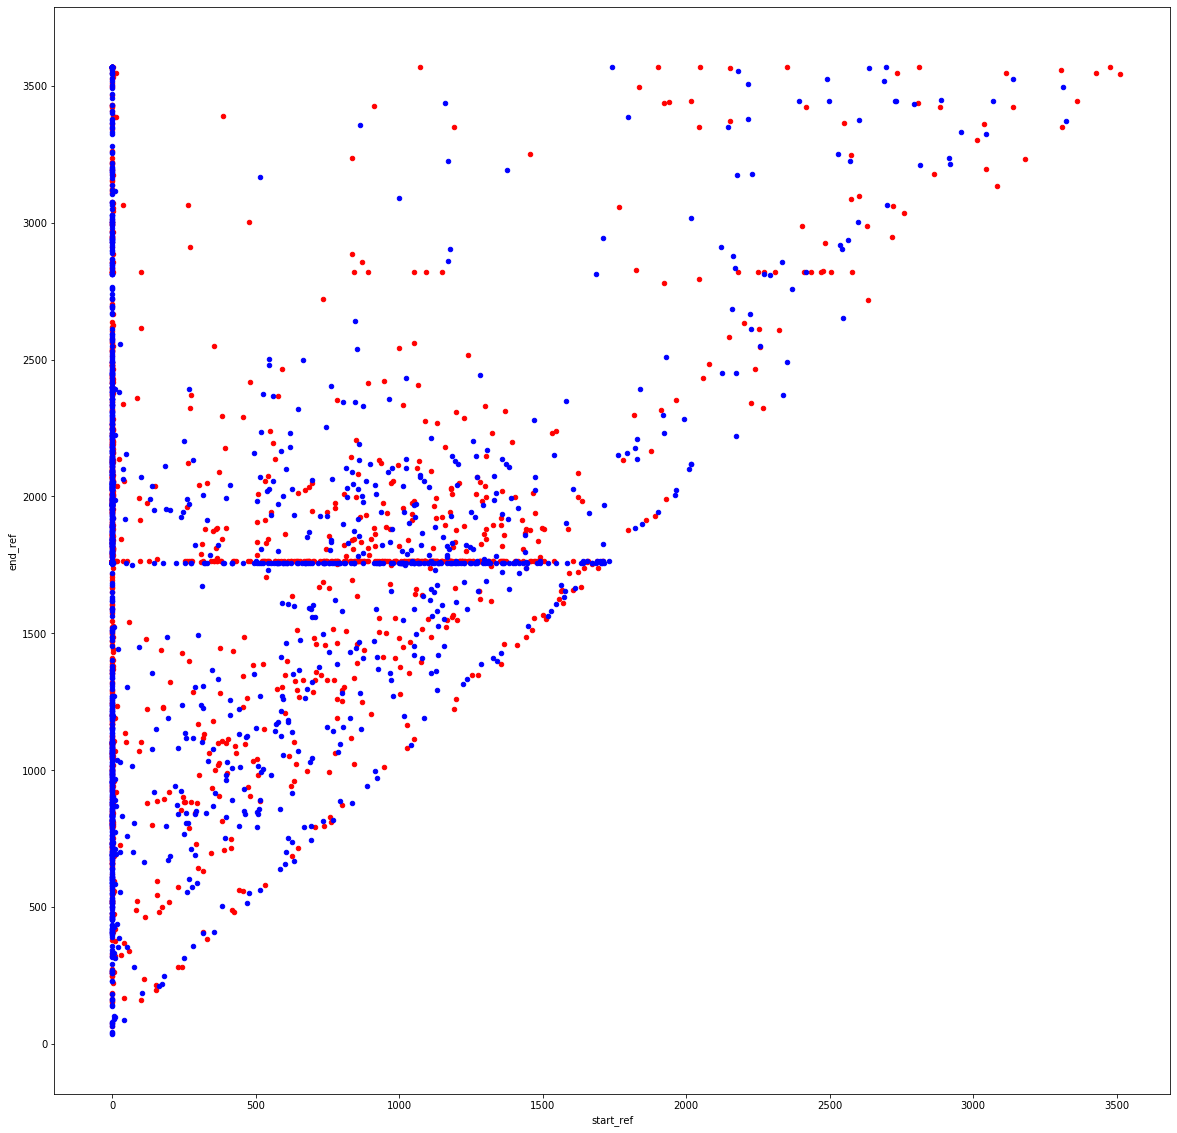

In [36]:
fig, ax = plt.subplots()
b[b.strand == 'plus'].plot(x='start_ref', y='end_ref', kind='scatter', ax=ax, color='red')
b[b.strand == 'minus'].plot(x='start_ref', y='end_ref', kind='scatter', ax=ax, color='blue')

fig.set_size_inches(20,20)

In [28]:
b.groupby('read').start_ref.count().reset_index().groupby('start_ref').count()

,read
start_ref,
1,8053
2,217
3,1


In [20]:
b.groupby('end_ref').read.count().sort_values()

end_ref
41         1
1749       1
2917       1
2910       1
2909       1
1759       1
1761       1
2904       1
2901       1
2898       1
1769       1
2896       1
1772       1
2893       1
2892       1
1778       1
1781       1
1784       1
1786       1
1790       1
2883       1
2882       1
1795       1
1796       1
1797       1
1799       1
2879       1
1803       1
1747       1
2918       1
        ... 
3010      11
3374      11
3553      12
3441      12
3013      12
3559      13
2697      13
3435      13
3446      14
3383      15
1756      16
3563      17
3444      17
3445      17
3552      17
3422      21
3439      23
3562      26
3447      26
3557      31
3548      31
3561      37
1757      65
3567      72
3564      85
3566      85
1764     128
3565     130
3569    1525
3568    2395
Name: read, Length: 1866, dtype: int64

In [ ]:
###### new data #######

In [105]:
sample_dirs = glob.glob('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_*')
for sample in sample dirs:
    blast_paths = glob.glob(sample + '/tmp/*.blast')
    for i in blast_paths:
        b = blast_to_df(i)
        print('\n' + i.split('/')[-3])
        print(b.groupby('read').start_ref.count().reset_index().groupby('start_ref').count())
        mapped_once = b[b.groupby('read').end_ref.transform('count') == 1]
        print(f'percent of reads end in 1764: {100 * len(mapped_once[mapped_once.end_ref == 1764]) / len(mapped_once)}')
    



2813_sample_sample_15
           read
start_ref      
1          2564
2           181
3             6
percent of reads end in 1764: 14.0795631825273


In [79]:
blast_paths

[]

In [59]:
unite_all_freq_files('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/', '/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/all_freqs.csv')

def unite_all_freq_files(freqs_dir, out_path=None):
    """
    unites all frequency file into one file, with 'File' field added
    """
    freqs_df = []
    # read all freq files and add the sample name to the data frame
    files = [os.path.join(freqs_dir, f) for f in os.listdir(freqs_dir) if not f.startswith('all') and f.endswith('.freqs')]
    for f in files:
        print(f)
        curr_df = pd.read_csv(f, '\t')
        curr_df = compatibilty_old_to_new(curr_df)
        sample = os.path.basename(f)
        curr_df['File'] = sample
        freqs_df.append(curr_df)
    df = pd.concat(freqs_df)
    if out_path != None:
        df.to_csv(out_path, index=False)
    return df

/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_0-z.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_15.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_2h-u.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_2h-z.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_30.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_on-u.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_on-z.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/2813_sample_sample_o-u.freqs


,ref_position,base,frequency,ref_base,coverage,rank,probability,File
0,1.0,G,1.000000,G,513,0,1.00,2813_sample_sample_0-z.freqs
1,1.0,A,0.000000,G,513,1,-0.00,2813_sample_sample_0-z.freqs
2,1.0,C,0.000000,G,513,2,-0.00,2813_sample_sample_0-z.freqs
3,1.0,T,0.000000,G,513,3,-0.00,2813_sample_sample_0-z.freqs
4,1.0,-,0.000000,G,513,4,-0.00,2813_sample_sample_0-z.freqs
5,2.0,G,1.000000,G,608,0,1.00,2813_sample_sample_0-z.freqs
6,2.0,A,0.000000,G,608,1,-0.00,2813_sample_sample_0-z.freqs
7,2.0,C,0.000000,G,608,2,-0.00,2813_sample_sample_0-z.freqs
8,2.0,T,0.000000,G,608,3,-0.00,2813_sample_sample_0-z.freqs
9,2.0,-,0.000000,G,608,4,-0.00,2813_sample_sample_0-z.freqs


In [60]:
df = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/all_freqs.csv')



In [63]:
df[(df.ref_base != df.base) & (df.ref_base != '-') & (df.frequency > 0.01) & (df.ref_position.isin(range(20,3549)))].sort_values('frequency')

,ref_position,base,frequency,ref_base,coverage,rank,probability,File
31451,2476.0,T,0.010204,C,294,1,0.95,2813_sample_sample_15.freqs
92256,3360.0,C,0.010256,T,195,1,0.87,2813_sample_sample_30.freqs
90271,2965.0,C,0.010417,T,288,1,0.95,2813_sample_sample_30.freqs
74381,3455.0,A,0.010695,G,187,1,0.87,2813_sample_sample_2h-z.freqs
60326,684.0,G,0.011111,A,270,1,0.95,2813_sample_sample_2h-z.freqs
60351,689.0,G,0.011152,T,269,1,0.95,2813_sample_sample_2h-z.freqs
129296,2877.0,-,0.012422,G,161,1,0.87,2813_sample_sample_on-z.freqs
9761,1883.0,T,0.012442,C,643,1,1.00,2813_sample_sample_0-z.freqs
129491,2916.0,-,0.012500,G,160,1,0.87,2813_sample_sample_on-z.freqs
128586,2739.0,A,0.012821,C,156,1,0.87,2813_sample_sample_on-z.freqs


<bound method Figure.set_size_inches of <Figure size 432x288 with 1 Axes>>

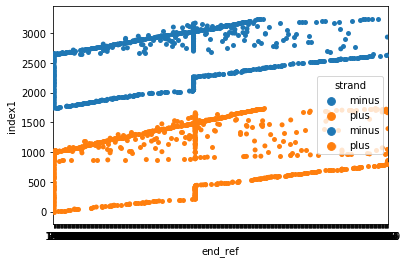

In [33]:
blast_paths = glob.glob('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_30/tmp/*.blast')
b = blast_to_df(blast_paths[0])
mapped_once = b[b.groupby('read').end_ref.transform('count') == 1]

fig, ax = plt.subplots()
start_plus = mapped_once[(mapped_once.start_ref == 1) & (mapped_once.strand == 'plus')].sort_values(['strand','start_ref','end_ref'])
end_plus = mapped_once[(mapped_once.start_ref != 1) & (mapped_once.strand == 'plus')].sort_values(['strand','start_ref','end_ref'])
start_minus = mapped_once[(mapped_once.start_ref == 1) & (mapped_once.strand == 'minus')].sort_values(['strand','start_ref','end_ref'])
end_minus = mapped_once[(mapped_once.start_ref != 1) & (mapped_once.strand == 'minus')].sort_values(['strand','start_ref','end_ref'])
mapped_once = pd.concat([start_plus, end_plus, start_minus, end_minus], sort=False).reset_index()
mapped_once['index1'] = mapped_once.index
mapped_once = mapped_once.sample(1000)

#mapped_once = mapped_once.sort_values(['strand','start_ref','end_ref']).reset_index()


sns.stripplot(x=mapped_once['start_ref'], y=mapped_once['index1'], ax=ax, hue=mapped_once['strand'])
sns.stripplot(x=mapped_once['end_ref'], y=mapped_once['index1'], ax=ax, hue=mapped_once['strand'])
#sns.stripplot(data=mapped_once[mapped_once.strand == 'plus'].head(1000), x='end_ref', y='index1', ax=ax, color='red')
#sns.stripplot(data=mapped_once[mapped_once.strand == 'minus'].head(1000), x='start_ref', y='index1', ax=ax, color='blue')
#sns.stripplot(data=mapped_once[mapped_once.strand == 'minus'].head(1000), x='end_ref', y='index1', ax=ax, color='blue')
fig.set_size_inches

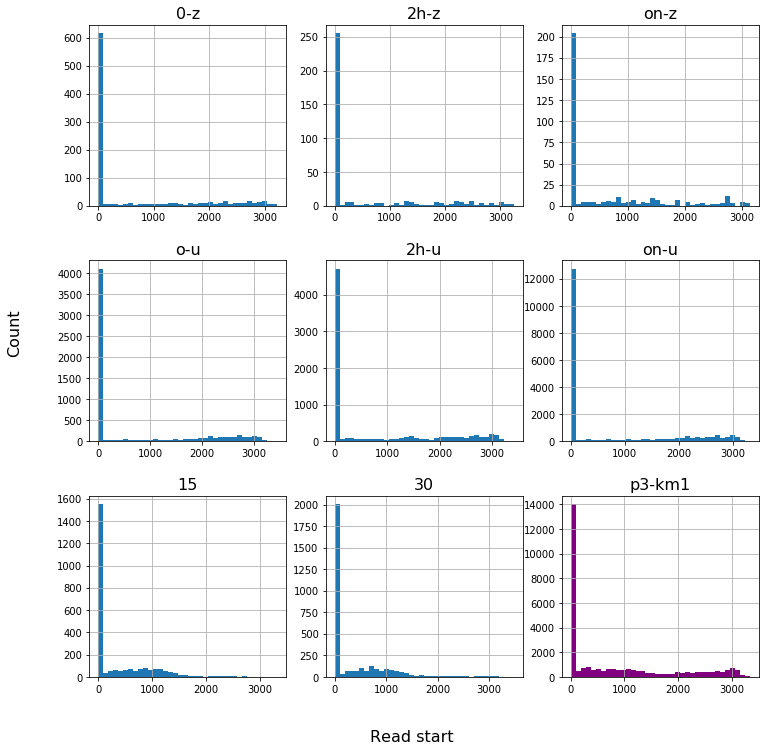

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=3)
axes = axes.flatten()
order = {'0-z':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_0-z',
         '2h-z':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-z', 
         'on-z':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_on-z', 
         'o-u':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_o-u', 
         '2h-u':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-u', 
         'on-u':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_on-u', 
         '15':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_15', 
         '30':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/2813_sample_sample_30', 
         'p3-km1':'/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/2543_sample_p3-km1_nopip'}

for sample, a in zip(order, axes):
    blast_paths = glob.glob(order[sample] + '/tmp/*.blast')
    blasts = []
    for i in blast_paths:
        blasts.append(blast_to_df(i))
    b = pd.concat(blasts)
    mapped_once = b[b.groupby('read').start_ref.transform('count') == 1]
    if sample == 'p3-km1':
        mapped_once.start_ref.hist(bins=36, ax=a, color='purple')
    else:
        mapped_once.start_ref.hist(bins=36, ax=a)
    a.set_title(sample, fontsize=16)
fig.text(s='Read start', x=0.45, y=0.05, fontsize=16)
fig.text(s='Count', y=0.5, x=0.03, fontsize=16, rotation=90)
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

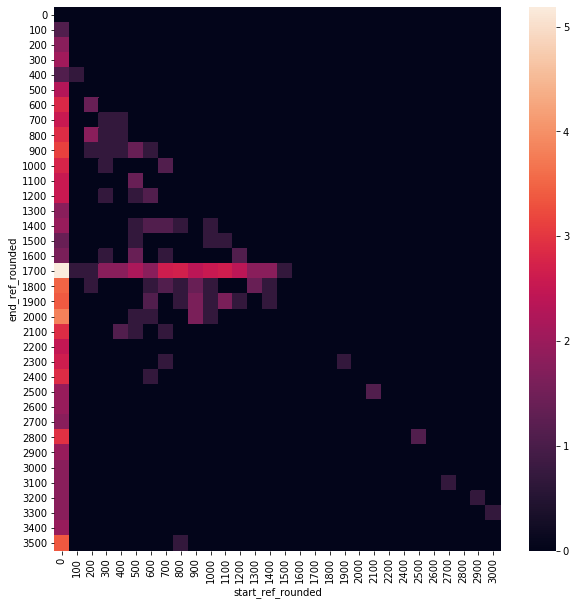

In [70]:
mapped_once['start_ref_rounded'] = (mapped_once.start_ref //100 ) * 100
mapped_once['end_ref_rounded'] = (mapped_once.end_ref //100 ) * 100
d = mapped_once.groupby(['start_ref_rounded', 'end_ref_rounded']).btop.count().reset_index()
d['btop'] = np.log(d.btop)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(d.pivot(index='end_ref_rounded', columns='start_ref_rounded', values='btop').fillna(0), ax=ax)

In [59]:

sns.heatmap(mapped_once.groupby(['start_ref_rounded', 'end_ref_rounded']).btop.count().reset_index().pivot(index='end_ref_rounded', columns='start_ref_rounded', values='btop').fillna(0.0001).log())



AttributeError: 'DataFrame' object has no attribute 'log'

In [16]:
df = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/perl_pipeline/freqs/all_freqs.csv')
df['File'] = df.File.str.split('_').str[3].str.replace('.freqs', '')

df_old = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/2543_sample_p3-km1_nopip/2543.freqs', '\t')
df_old = compatibilty_old_to_new(df_old)
df_old['File'] = 'p3-km1'
df = pd.concat([df, df_old])

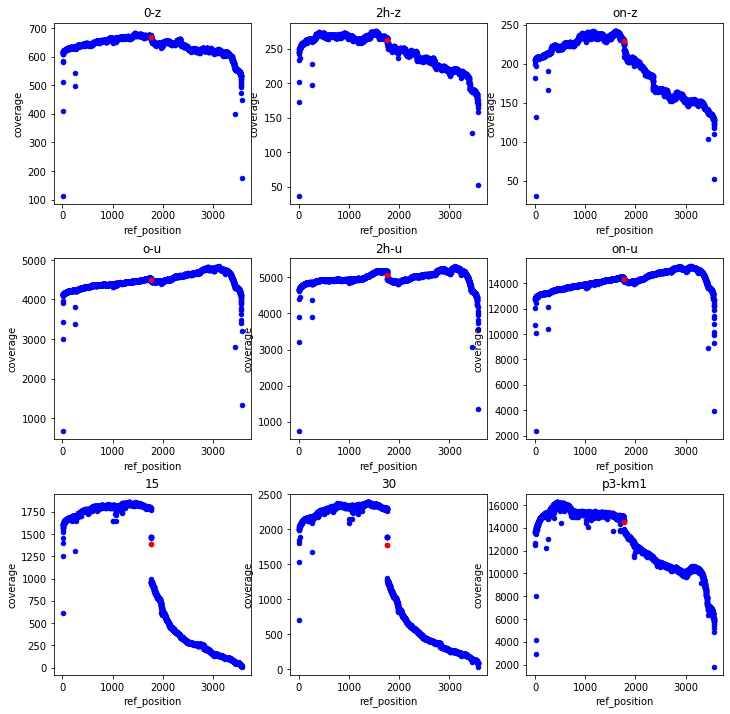

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3)
axes = axes.flatten()
order = ['0-z', '2h-z', 'on-z', 'o-u', '2h-u', 'on-u', '15', '30', 'p3-km1']
for sample, a in zip(order, axes):
    df_line = df[(df.File == sample) & (df.base == df.ref_base) & (df.ref_base != '-')]
    df_line.plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='blue')
    df_line[df_line.ref_position == 1764].plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='red')
    a.set_title(sample)

fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0.3, wspace=0.2)



In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)
axes = axes.flatten()
order = ['0-z', '2h-z', 'on-z', 'o-u', '2h-u', 'on-u', '15', '30']
for sample, a in zip(order, axes):
    df_line = df[(df.File == sample) & (df.base == df.ref_base) & (df.ref_base != '-')]
    df_line.plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='blue')
    df_line[df_line.ref_position == 1764].plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='red')
    a.set_title(sample)
    a.set_ylim(df_line[df_line.ref_position == 3560].coverage.min(),)
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

In [19]:
def split_fastq_by_strand(original_fastq, tmp_pipeline_dir, new_fastq_basename):
    blasts = []
    for i in glob.glob(tmp_pipeline_dir + '/*.blast'):
        blasts.append(blast_to_df(i))
    blasts = pd.concat(blasts)
    blasts[blasts.strand == 'plus'][['read']].to_csv(new_fastq_basename + '.plus.csv', index=False, header=False)
    blasts[blasts.strand == 'minus'][['read']].to_csv(new_fastq_basename + '.minus.csv', index=False, header=False)
    os.system(f'for x in $(cat {new_fastq_basename}.plus.csv); do grep $x -A 3 {original_fastq} >> {new_fastq_basename}.plus.fastq; done')
    os.system(f'for x in $(cat {new_fastq_basename}.minus.csv); do grep $x -A 3 {original_fastq} >> {new_fastq_basename}.minus.fastq; done')
    return 
    
    

In [ ]:
for i in ['0-z', '2h-z', 'on-z', 'o-u', '2h-u', 'on-u', '15', '30']:
    split_fastq_by_strand('/sternadi/datasets/volume2/ms2_loop_genomics_20200831/only_fastqs/2543_sample_p3-km1_nopip/2543_sample_p3-km1_nopip_contig_list_trimmed.fastq', '/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/2543_sample_p3-km1_nopip/tmp', '/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/stranded_fastqs/p3-km1-nopip')



In [21]:
split_fastq_by_strand('/sternadi/datasets/volume2/ms2_loop_genomics_20200831/only_fastqs/2543_sample_p3-km1_nopip/2543_sample_p3-km1_nopip_contig_list_trimmed.fastq', '/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/2543_sample_p3-km1_nopip/tmp/', '/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/stranded_fastqs/p3-km1')


In [173]:
def unite_all_freq_files(freqs_dir, out_path=None):
    """
    unites all frequency file into one file, with 'File' field added
    """
    freqs_df = []
    # read all freq files and add the sample name to the data frame
    files = [os.path.join(freqs_dir, f) for f in os.listdir(freqs_dir) if not f.startswith('all') and f.endswith('.freqs')]
    for f in files:
        print(f)
        curr_df = pd.read_csv(f, '\t')
        curr_df = compatibilty_old_to_new(curr_df)
        sample = os.path.basename(f)
        curr_df['File'] = sample
        freqs_df.append(curr_df)
    df = pd.concat(freqs_df)
    if out_path != None:
        df.to_csv(out_path, index=False)
    return df


unite_all_freq_files('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/', '/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/all_freqs.csv')




/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/0-z.minus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/0-z.plus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/15.minus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/15.plus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/2h-u.minus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/2h-u.plus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/2h-z.minus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/2h-z.plus.freqs
/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/30.minus.freqs
/ste

,ref_position,base,frequency,ref_base,coverage,rank,probability,File
0,1.0,G,1.000000,G,13,0,1.00,0-z.minus.freqs
1,1.0,A,0.000000,G,13,1,-0.00,0-z.minus.freqs
2,1.0,C,0.000000,G,13,2,-0.00,0-z.minus.freqs
3,1.0,T,0.000000,G,13,3,-0.00,0-z.minus.freqs
4,1.0,-,0.000000,G,13,4,-0.00,0-z.minus.freqs
5,2.0,G,1.000000,G,14,0,1.00,0-z.minus.freqs
6,2.0,A,0.000000,G,14,1,-0.00,0-z.minus.freqs
7,2.0,C,0.000000,G,14,2,-0.00,0-z.minus.freqs
8,2.0,T,0.000000,G,14,3,-0.00,0-z.minus.freqs
9,2.0,-,0.000000,G,14,4,-0.00,0-z.minus.freqs


In [101]:
df = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_202012/stranded_perl_pipeline/freqs/all_freqs.csv')
df['File'] = df['File'].str.replace('.freqs', '')

df2 = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/stranded_perl_pipeline/p3-km1-minus/p3-km1-minus.freqs', '\t')
df3 = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/stranded_perl_pipeline/p3-km1-plus/p3-km1-plus.freqs', '\t')
df2['File'] = 'p3-km1.minus'
df3['File'] = 'p3-km1.plus'
df2 = compatibilty_old_to_new(df2)
df3 = compatibilty_old_to_new(df3)
df = pd.concat([df,df2,df3])


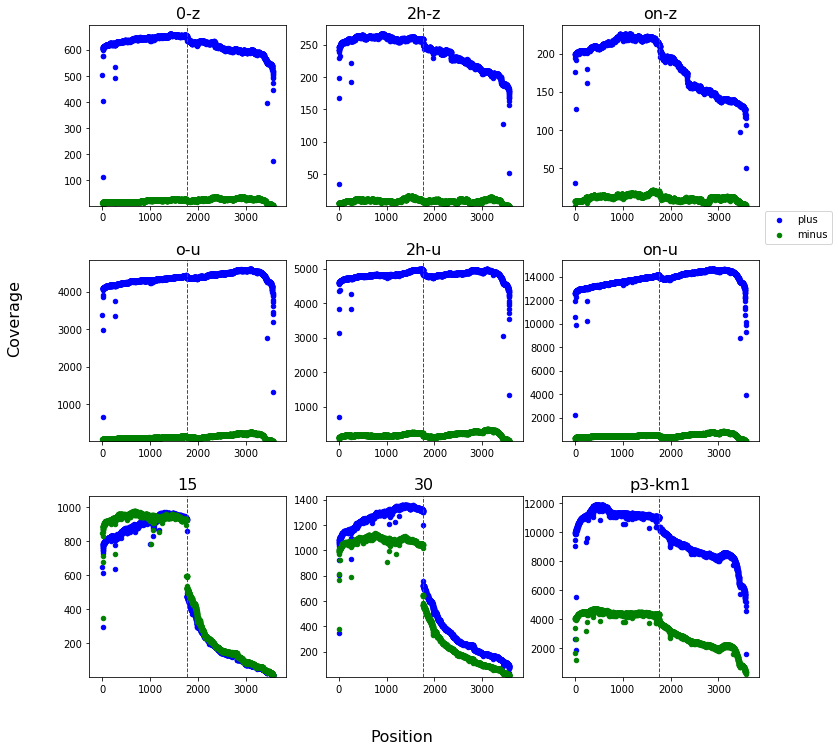

In [112]:
fig, axes = plt.subplots(nrows=3, ncols=3)
axes = axes.flatten()
order = ['0-z', '2h-z', 'on-z', 'o-u', '2h-u', 'on-u', '15', '30', 'p3-km1']
for sample, a in zip(order, axes):
    df_line = df[(df.File.isin([sample + '.minus', sample + '.plus'])) & (df.base == df.ref_base) & (df.ref_base != '-')]
    df_line[df_line.File == sample + '.plus'].plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='blue', label='plus')
    #df_line[(df_line.ref_position == 1764) & (df_line.File == sample + '.plus')].plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='red')
    df_line[df_line.File == sample + '.minus'].plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='green', label='minus')
    #df_line[(df_line.ref_position == 1764) & (df_line.File == sample + '.minus')].plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='orange')
    a.axvline(x=1764, ls='--', color='red', lw=1)
    a.set_ylim(1,)
    a.set_ylabel('')
    a.set_xlabel('')
    if sample != 'on-z':
        a.legend().set_visible(False)
    else:
        a.legend(loc="upper center", bbox_to_anchor=(1.2, 0))
    a.set_title(sample, fontsize=16)
fig.text(s='Position', x=0.45, y=0.05, fontsize=16)
fig.text(s='Coverage', y=0.5, x=0.03, fontsize=16, rotation=90)
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

In [124]:
# mutations

df['full_mutation'] = df.ref_base + df.ref_position.astype(str) + df.base 
df.to_csv('/sternadi/home/volume2/noam/ms2/short_genomes/loop_201220/stranded_freqs.csv', index=False)

In [123]:
df[(df.base != df.ref_base) & (df.ref_base != '-') & (df.frequency > 0.01) & (df.ref_position.isin(range(30,3539)))]

,ref_position,base,frequency,ref_base,coverage,rank,probability,File,full_mutation
5551,1109.0,C,0.043478,T,23,1,0.66,0-z.minus,T1109.0C
7811,1561.0,C,0.034483,T,29,1,0.65,0-z.minus,T1561.0C
8136,1626.0,T,0.041667,A,24,1,0.65,0-z.minus,A1626.0T
8966,1792.0,-,0.047619,T,21,1,0.66,0-z.minus,T1792.0-
10066,2012.0,-,0.037037,T,27,1,0.65,0-z.minus,T2012.0-
10641,2127.0,C,0.037037,T,27,1,0.65,0-z.minus,T2127.0C
11786,2355.0,G,0.028571,A,35,1,0.65,0-z.minus,A2355.0G
12126,2423.0,C,0.032258,T,31,1,0.65,0-z.minus,T2423.0C
12141,2426.0,T,0.033333,C,30,1,0.65,0-z.minus,C2426.0T
12201,2438.0,T,0.033333,C,30,1,0.65,0-z.minus,C2438.0T


In [125]:
df[(df.ref_base != df.base) & (df.ref_base != '-') & (df.frequency > 0.01)].full_mutation.drop_duplicates().tolist()



['T15.0-',
 'T1109.0C',
 'T1561.0C',
 'A1626.0T',
 'T1792.0-',
 'T2012.0-',
 'T2127.0C',
 'A2355.0G',
 'T2423.0C',
 'C2426.0T',
 'C2438.0T',
 'C2494.0T',
 'T2600.0C',
 'A2626.0G',
 'A2702.0T',
 'T2831.0C',
 'G2995.0-',
 'A3014.0T',
 'G3092.0-',
 'C3133.0T',
 'T3136.0A',
 'G3193.0T',
 'A3247.0G',
 'G3385.0A',
 'A8.0G',
 'C1883.0T',
 'G3235.0T',
 'C3245.0T',
 'A3500.0G',
 'C3556.0G',
 'A3558.0G',
 'T3561.0A',
 'C3564.0T',
 'C3566.0G',
 'A2473.0G',
 'C2476.0T',
 'G2815.0A',
 'G2819.0A',
 'T2924.0C',
 'T3118.0G',
 'A3120.0G',
 'C3122.0G',
 'C3124.0T',
 'C3126.0A',
 'T13.0G',
 'T14.0A',
 'T15.0A',
 'C16.0A',
 'G553.0-',
 'G1234.0-',
 'T2175.0C',
 'G3394.0A',
 'C3444.0T',
 'A3445.0C',
 'A3476.0T',
 'C3483.0G',
 'G3518.0A',
 'G3539.0A',
 'A152.0T',
 'C371.0T',
 'A458.0T',
 'G492.0A',
 'T557.0-',
 'T689.0G',
 'G921.0T',
 'G1323.0A',
 'C1381.0T',
 'C1657.0-',
 'C1774.0A',
 'T2130.0G',
 'T2543.0C',
 'T2667.0A',
 'G2770.0A',
 'G3135.0A',
 'A684.0G',
 'A2762.0G',
 'G3237.0A',
 'G3455.0A',
 'A2466.

In [16]:
## plasmids library

df = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/MC-plasmids-moi10-Feb21-227573346/freqs/all_freqs.csv')
df = df[~df.File.str.contains('carmel')]
df = estimate_insertion_freq(df, ['File'])



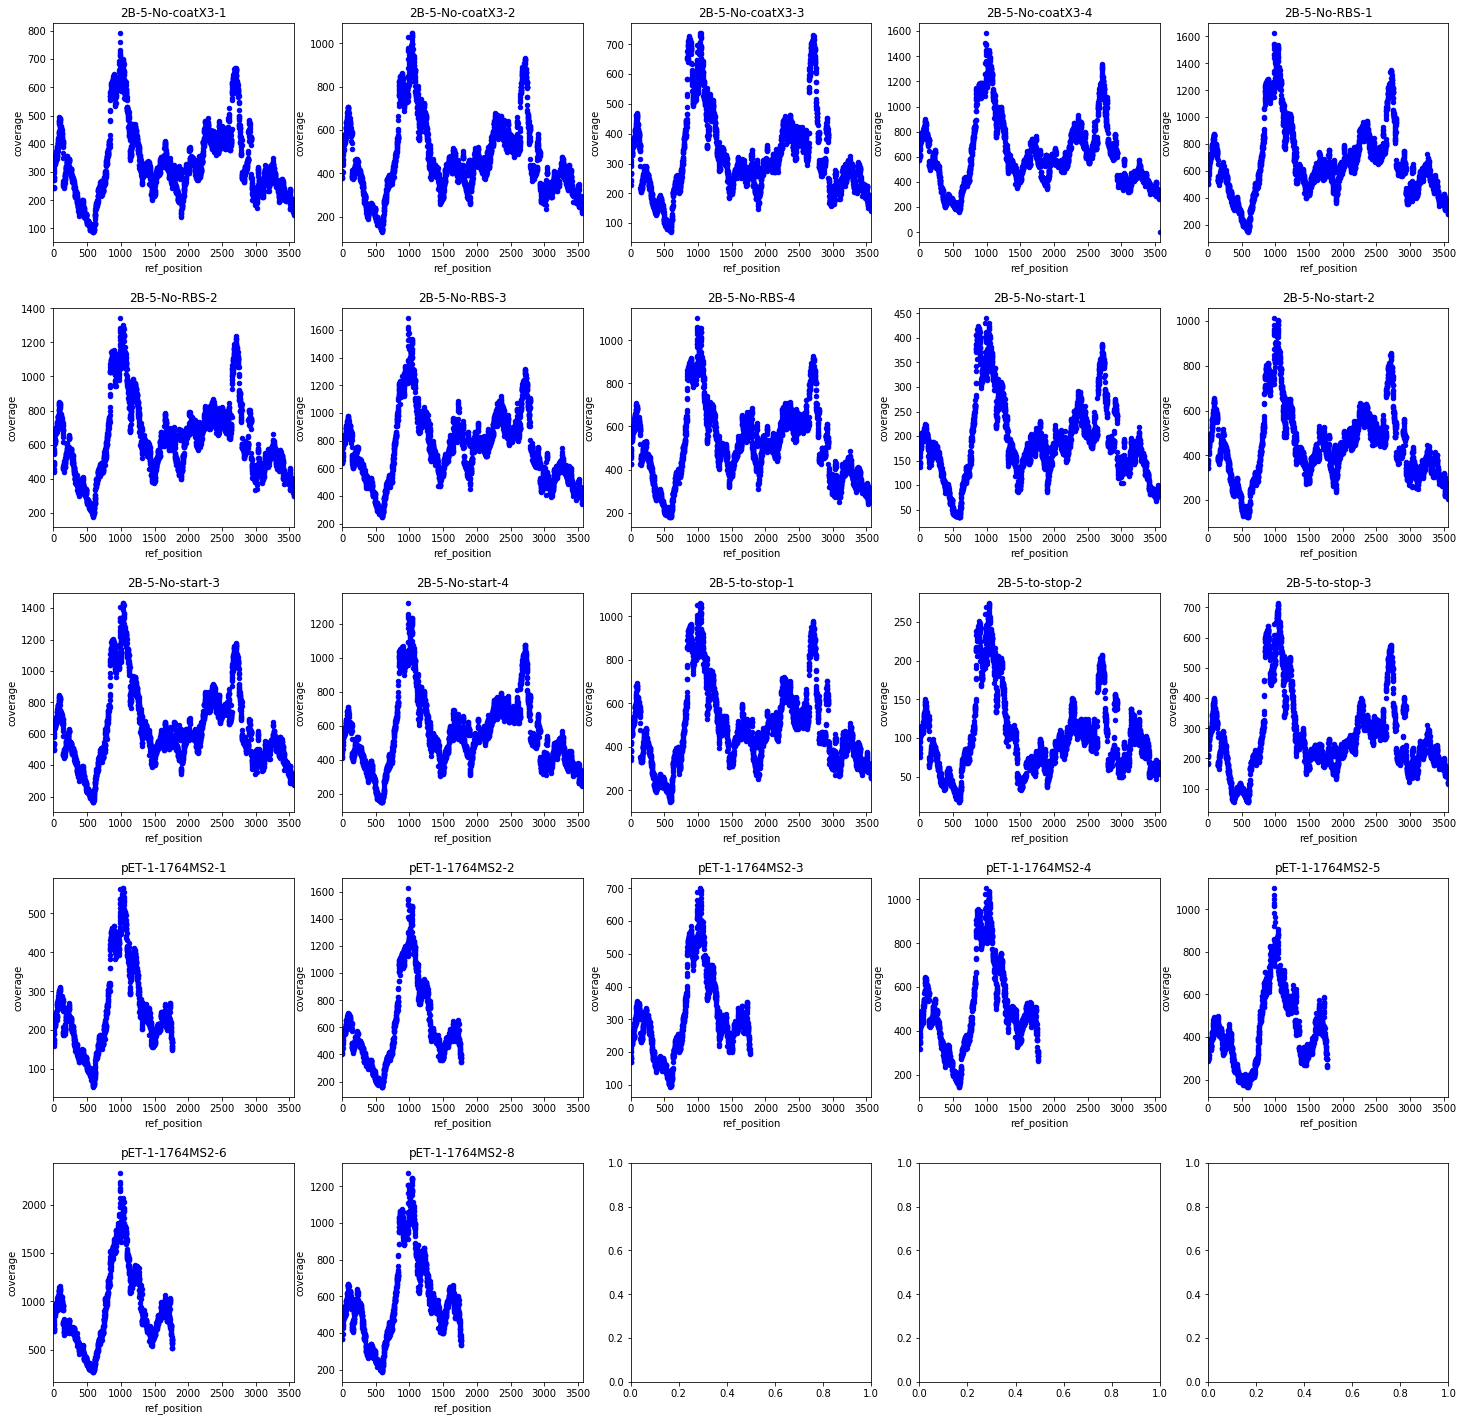

In [8]:
# check coverages
fig, axes = plt.subplots(nrows=5, ncols=5)
axes = axes.flatten()
for sample, a in zip(df.File.drop_duplicates().tolist(), axes):
    df_line = df[(df.File == sample) & (df.base == df.ref_base) & (df.ref_base != '-')]
    df_line.plot(x='ref_position', y='coverage', kind='scatter', ax=a, color='blue')
    a.set_title(sample)
    a.set_xlim(0,3570)

fig.set_size_inches(25, 25)
fig.subplots_adjust(hspace=0.3, wspace=0.2)



In [25]:
df[((df.ref_base != df.base) & (df.ref_base != '-') & (df.frequency > 0.05)) | ((df.ref_base == '-') & (df.estimated_freq > 0.05))].to_csv('/sternadi/nobackup/volume1/noam/ms2_data/MC-plasmids-moi10-Feb21-227573346/freqs/mutations.over_05.csv')


